In [1]:
import tensorflow as tf
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.impute import SimpleImputer

In [2]:
tf.__version__

'2.12.0'

## Applying Over Housing Data

In [3]:
import pandas as pd 
path = '/Users/sadiakhanrupa/Bootcamp Main Phase/Dr.-Greenthumb-Decoding-Nature-s-Needs/notebooks/housing_iteration_6_regression.csv'

data = pd.read_csv(path)

In [4]:
data.head()
dataset = data.drop(['Id'], axis=1)

In [5]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# splitting data

In [6]:
X = dataset.copy()
y = X.pop('SalePrice')

In [7]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [10]:
y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

In [11]:
X_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      217
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [12]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt  

## Converting into tensor

In [13]:
import tensorflow as tf
import numpy as np

print(X_train.values.dtype)
print(y_train.dtype)

X_num_train = X_train.select_dtypes(include='number')

object
int64


In [14]:
X_num_train.isna().sum()

MSSubClass         0
LotFrontage      217
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         6
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [15]:
simple_imputer = SimpleImputer(strategy='mean')

In [16]:
simple_imputer.fit(X_num_train)

SimpleImputer()

In [17]:
X_num_train_imputed = simple_imputer.fit_transform(X_num_train)

In [18]:
X_num_test = X_test.select_dtypes(include='number')

In [19]:
X_num_test_imputed = simple_imputer.fit_transform(X_num_test)

In [20]:
X_num_test_imputed.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

# 2. Convert the data to tensors


In [21]:
X_train_tensor = tf.convert_to_tensor(X_num_train_imputed.values)
y_train_tensor = tf.convert_to_tensor(y_train)

# 3. Define the layers of your model

In [33]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation = 'relu'),
    tf.keras.layers.Dense(units= 1, activation= 'sigmoid')
])

## Compile The Model


In [34]:
my_model.compile(
    optimizer=tf.optimizers.legacy.Adam(learning_rate=.1), loss='mse'
)

# Fit the model

In [35]:
history = my_model.fit(
    X_train_tensor, y_train_tensor,
    epochs=20,
    verbose=0,
    validation_split=.02
)

In [36]:
history.history

{'loss': [38714896384.0,
  38714896384.0,
  38714892288.0,
  38714892288.0,
  38714888192.0,
  38714888192.0,
  38714888192.0,
  38714892288.0,
  38714892288.0,
  38714892288.0,
  38714888192.0,
  38714892288.0,
  38714888192.0,
  38714892288.0,
  38714888192.0,
  38714888192.0,
  38714888192.0,
  38714892288.0,
  38714892288.0,
  38714888192.0],
 'val_loss': [47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0,
  47004266496.0]}

# plot the loss

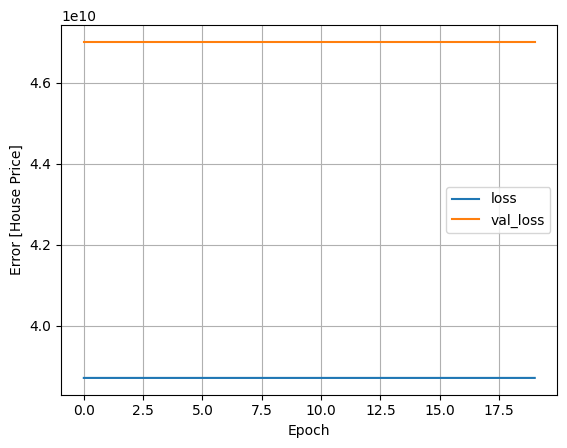

In [37]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [House Price]')
    plt.legend()
    plt.grid(True)
plot_loss(history)
plt.show()

# Check the performance on the test set


In [38]:
from sklearn.metrics import mean_absolute_error
predictions= my_model.predict(X_num_test_imputed)
mean_absolute_error(y_test, predictions)

10/10 [==============================] - 0s 501us/step


178838.81164383562

In [39]:
y_test[892]

154500

In [41]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],